In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [2]:
df = pd.read_csv('datasets/mnist-digit-train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_features = df.drop('label', axis=1)
df_labels = df['label']

In [7]:
df_labels.sample(10)

12348    8
11292    0
30096    8
40241    8
24260    7
4639     5
23166    5
4580     5
4665     7
2904     3
Name: label, dtype: int64

In [11]:
def display_image(index):
    print("Digit: ", df_labels[index])
    plt.imshow(df_features.loc[index].values.reshape(28,28),'Greys')

Digit:  0


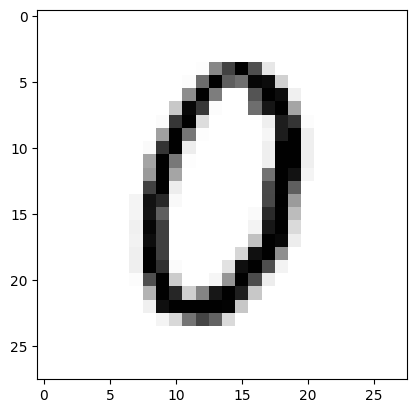

In [13]:
display_image(5)

In [15]:
df_features = np.asarray(df_features)
df_features[10][150:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   7,  24,  24,  97, 253, 253, 253, 253, 255,
       180,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [16]:
df_features = df_features/255.
df_features[10][150:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02745098, 0.09411765, 0.09411765, 0.38039216, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 1.        , 0.70588235,
       0.18823529, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df_features,
                                                    df_labels,
                                                    shuffle=True,
                                                    test_size=0.2)

In [18]:
logistic = linear_model.LogisticRegression(solver='lbfgs',
                                           max_iter=1000,
                                           multi_class='multinomial')

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C':[0.1, 1, 5]}]

grid_search = GridSearchCV(logistic, param_grid, cv=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 0.1}

In [20]:
for i in range(3):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])    

Parameters:  {'C': 0.1}
Mean Test Score:  0.9155952380952381
Rank:  1
Parameters:  {'C': 1}
Mean Test Score:  0.9093154761904761
Rank:  2
Parameters:  {'C': 5}
Mean Test Score:  0.8998809523809523
Rank:  3


In [21]:
rbm = BernoulliRBM(verbose=True)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm),
                                          ('logistic', logistic)])

rbm.learning_rate = 0.06
logistic.C = grid_search.best_params_['C']

In [22]:
param_grid = [{'rbm__n_components' : [5, 50, 100, 150],
              'rbm__n_iter' : [5, 20]}]

grid_search = GridSearchCV(rbm_features_classifier, param_grid, cv=2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

[BernoulliRBM] Iteration 1, pseudo-likelihood = -198.62, time = 0.36s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -195.16, time = 0.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -196.01, time = 0.49s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -195.79, time = 0.49s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -199.87, time = 0.50s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -204.52, time = 0.39s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -203.33, time = 0.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -202.05, time = 0.49s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -198.98, time = 0.49s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -206.42, time = 0.49s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -197.03, time = 0.38s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -200.78, time = 0.49s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -195.38, time = 0.49s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -194.05, time = 0.49s
[BernoulliRBM] Itera

{'rbm__n_components': 150, 'rbm__n_iter': 20}

In [23]:
for i in range(8):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])    

Parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 5}
Mean Test Score:  0.11422619047619048
Rank:  8
Parameters:  {'rbm__n_components': 5, 'rbm__n_iter': 20}
Mean Test Score:  0.1630952380952381
Rank:  7
Parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 5}
Mean Test Score:  0.8892261904761904
Rank:  6
Parameters:  {'rbm__n_components': 50, 'rbm__n_iter': 20}
Mean Test Score:  0.8920833333333333
Rank:  5
Parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 5}
Mean Test Score:  0.9210714285714285
Rank:  4
Parameters:  {'rbm__n_components': 100, 'rbm__n_iter': 20}
Mean Test Score:  0.922797619047619
Rank:  3
Parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 5}
Mean Test Score:  0.9342261904761905
Rank:  2
Parameters:  {'rbm__n_components': 150, 'rbm__n_iter': 20}
Mean Test Score:  0.9351190476190476
Rank:  1
